In [1]:
from libs.data_manipulation import *
from libs.dim_reduction import *
from libs.feature_generation import *
from libs.clustering import *
from libs.convex_hull import *
from libs.alpha_shape import *
from libs.weight_generator import *

In [2]:
england_df = compile_team_tracking_data("data", "England")
england_df = extract_one_match(england_df).iloc[::48]

In [3]:
print(england_df)

        Time [s]  Time [s]_team half_team  minute_team  Period_team  \
0           0.00           0.00        1H            0            1   
48          1.92           1.92        1H            0            1   
96          3.84           3.84        1H            0            1   
144         5.76           5.76        1H            0            1   
192         7.68           7.68        1H            0            1   
...          ...            ...       ...          ...          ...   
141168   5579.08        5579.08        2H           92            2   
141216   5581.00        5581.00        2H           93            2   
141264   5582.92        5582.92        2H           93            2   
141312   5584.84        5584.84        2H           93            2   
141360   5586.76        5586.76        2H           93            2   

         home_6_x   home_6_y   home_1_x  home_1_y  home_10_x  ...  away_21_x  \
0      -10.097816   8.647056 -36.993767 -0.183120   0.064642  ...  

In [30]:
inverse_distance_list = calculate_weights(england_df, fun= lambda x: 1/x) #Inverse proportionality to distance
linear_distance_list = calculate_weights(england_df, fun= lambda x: 50 - x) #Linear weigh based upon distance
exp_pow_neg_dist_list = calculate_weights(england_df, fun= lambda x: np.exp(-x)) #Linear weigh based upon distance

['home_6_x', 'home_1_x', 'home_10_x', 'home_11_x', 'home_2_x', 'home_7_x', 'home_8_x', 'home_9_x', 'home_5_x', 'home_12_x', 'home_4_x', 'home_20_x', 'home_16_x', 'home_19_x', 'home_21_x']
['home_6_y', 'home_1_y', 'home_10_y', 'home_11_y', 'home_2_y', 'home_7_y', 'home_8_y', 'home_9_y', 'home_5_y', 'home_12_y', 'home_4_y', 'home_20_y', 'home_16_y', 'home_19_y', 'home_21_y']
['home_6_x', 'home_1_x', 'home_10_x', 'home_11_x', 'home_2_x', 'home_7_x', 'home_8_x', 'home_9_x', 'home_5_x', 'home_12_x', 'home_4_x', 'home_20_x', 'home_16_x', 'home_19_x', 'home_21_x']
['home_6_y', 'home_1_y', 'home_10_y', 'home_11_y', 'home_2_y', 'home_7_y', 'home_8_y', 'home_9_y', 'home_5_y', 'home_12_y', 'home_4_y', 'home_20_y', 'home_16_y', 'home_19_y', 'home_21_y']
['home_6_x', 'home_1_x', 'home_10_x', 'home_11_x', 'home_2_x', 'home_7_x', 'home_8_x', 'home_9_x', 'home_5_x', 'home_12_x', 'home_4_x', 'home_20_x', 'home_16_x', 'home_19_x', 'home_21_x']
['home_6_y', 'home_1_y', 'home_10_y', 'home_11_y', 'home_2_y

In [31]:
inverse_distance_flat =  [x for xs in inverse_distance_list for x in xs]
linear_distance_flat =  [x for xs in linear_distance_list for x in xs]
exp_pow_neg_dist_flat =  [x for xs in exp_pow_neg_dist_list for x in xs]

In [33]:
inverse_distance_flat_np = np.array(inverse_distance_flat)
linear_distance_flat_np = np.array(linear_distance_list)
exp_pow_neg_dist_flat_np = np.array(exp_pow_neg_dist_flat)


(array([  0.,  25.,  83., 141., 189., 216., 216., 293., 274., 257., 332.,
        352., 363., 334., 342., 333., 363., 324., 357., 356., 319., 291.,
        337., 377., 300., 343., 310., 301., 315., 320., 339., 331., 337.,
        343., 316., 317., 312., 297., 311., 297., 277., 359., 299., 306.,
        301., 295., 301., 293., 296., 290., 282., 254., 271., 273., 290.,
        272., 288., 291., 287., 326., 252., 238., 241., 222., 234., 259.,
        220., 218., 191., 207., 175., 208., 184., 198., 181., 164., 193.,
        169., 176., 150., 167., 178., 161., 153., 157., 175., 160., 162.,
        180., 141., 137., 145., 164., 164., 167., 143., 107., 110., 107.,
        112.,  78.,  80.,  86., 103., 106.,  81.,  88.,  92.,  80.,  97.,
         65.,  70.,  59.,  57.,  63.,  79.,  56.,  61.,  54.,  70.,  54.,
         62.,  63.,  57.,  32.,  45.,  55.,  46.,  56.,  43.,  37.,  47.,
         37.,  44.,  41.,  41.,  30.,  30.,  32.,  42.,  29.,  35.,  40.,
         34.,  43.,  30.,  25.,  35., 

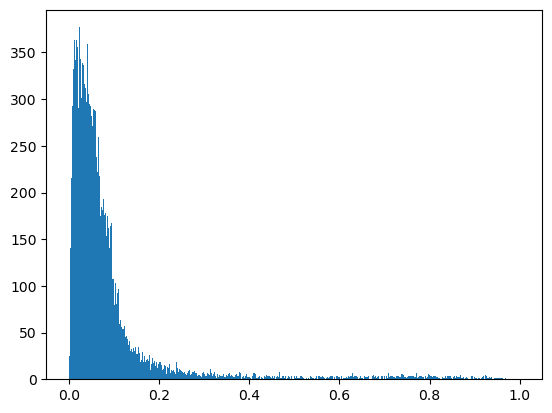

In [24]:
plt.hist(inverse_distance_flat_np, bins =np.linspace(0, 1, num= 1000))

(array([ 38.,  36.,  48.,  54.,  48.,  48.,  48.,  45.,  49.,  59.,  46.,
         49.,  55.,  61.,  44.,  52.,  60.,  79.,  63.,  64.,  78.,  71.,
         86.,  65.,  73.,  68.,  67.,  75.,  94.,  74.,  82.,  88.,  74.,
         86.,  89.,  93.,  88., 104.,  91.,  92., 101.,  88., 110., 105.,
        112., 117., 106., 106., 111., 119., 136., 139., 133., 149., 163.,
        162., 149., 189., 157., 182., 178., 171., 196., 180., 185., 211.,
        228., 225., 198., 219., 214., 238., 245., 210., 242., 239., 261.,
        267., 250., 241., 257., 272., 253., 257., 284., 293., 318., 305.,
        291., 256., 306., 274., 294., 298., 258., 311., 287., 269., 298.,
        302., 278., 295., 269., 291., 259., 275., 276., 258., 224., 238.,
        272., 270., 241., 257., 223., 215., 229., 214., 208., 227., 215.,
        205., 218., 203., 155., 195., 202., 174., 174., 175., 166., 164.,
        171., 161., 194., 129., 134., 139., 129., 123., 110., 114., 119.,
        120., 118., 113., 107., 111., 

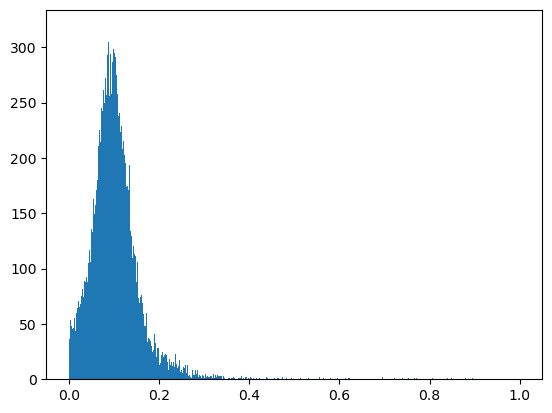

In [28]:
plt.hist(linear_distance_flat_np, bins =np.linspace(0, 1, num= 1000))

(array([2.6339e+04, 3.9900e+02, 2.1600e+02, 1.5800e+02, 1.2300e+02,
        8.3000e+01, 7.9000e+01, 7.2000e+01, 6.7000e+01, 4.5000e+01,
        6.8000e+01, 4.5000e+01, 4.3000e+01, 3.8000e+01, 2.9000e+01,
        3.2000e+01, 3.3000e+01, 3.0000e+01, 3.3000e+01, 4.0000e+01,
        3.5000e+01, 2.7000e+01, 2.9000e+01, 2.1000e+01, 2.2000e+01,
        2.9000e+01, 2.4000e+01, 3.0000e+01, 3.0000e+01, 2.9000e+01,
        2.1000e+01, 3.0000e+01, 2.6000e+01, 2.8000e+01, 2.9000e+01,
        2.6000e+01, 2.5000e+01, 4.3000e+01, 3.8000e+01, 4.0000e+01,
        4.2000e+01, 5.1000e+01, 5.4000e+01, 6.7000e+01, 7.5000e+01,
        1.0200e+02, 1.0300e+02, 1.6700e+02, 1.6160e+03]),
 array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
        0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
        0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
        0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
        0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.

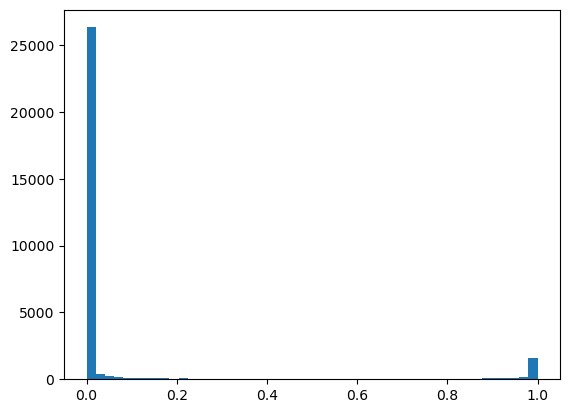

In [38]:
plt.hist(exp_pow_neg_dist_flat_np, bins =np.linspace(0, 1, num= 50))